In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('HR_ctprep.csv')
df = df.drop(columns='Unnamed: 0')

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,Near by,Higher Secondary,Life Sciences,1,Good,Female,94,Moderate,Intermediate,Sales Executive,Excellent,Single,5993,19479,8,Yes,11,3,Poor,No,8,0,Poor,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,Near by,High School,Life Sciences,2,Best,Male,61,Low,Intermediate,Research Scientist,Good,Married,5130,24907,1,No,23,4,Excellent,Low,10,3,Best,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,Near by,Higher Secondary,Other,4,Excellent,Male,92,Low,Beginner,Laboratory Technician,Best,Single,2090,2396,6,Yes,15,3,Good,No,7,3,Best,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,Near by,Masters,Life Sciences,5,Excellent,Female,56,Moderate,Beginner,Research Scientist,Best,Married,2909,23159,1,Yes,11,3,Best,No,8,3,Best,8,7,3,0


# Main Objective Does Attrition has any realtion to Other columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   object
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   object
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   object
 13  JobLevel                  1470 non-null   object
 14  JobRole                 

In [14]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'WorkLifeBalance'],
      dtype='object')

In [16]:
numerical_columns = df.select_dtypes(include=['int64'])
numerical_columns.columns

Index(['Age', 'DailyRate', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Correlation of Categorical Columns

In [22]:
from scipy.stats import chi2_contingency
categorical_columns = df.select_dtypes(include=['object'])

# Create an empty DataFrame for the correlation table
correlation_table = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

# Perform the chi-square test for each pair of categorical columns
for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        contingency_table = pd.crosstab(categorical_columns[col1], categorical_columns[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        correlation_table.loc[col1, col2] = p

# Convert p-values to numeric data type
correlation_table = correlation_table.astype(float)

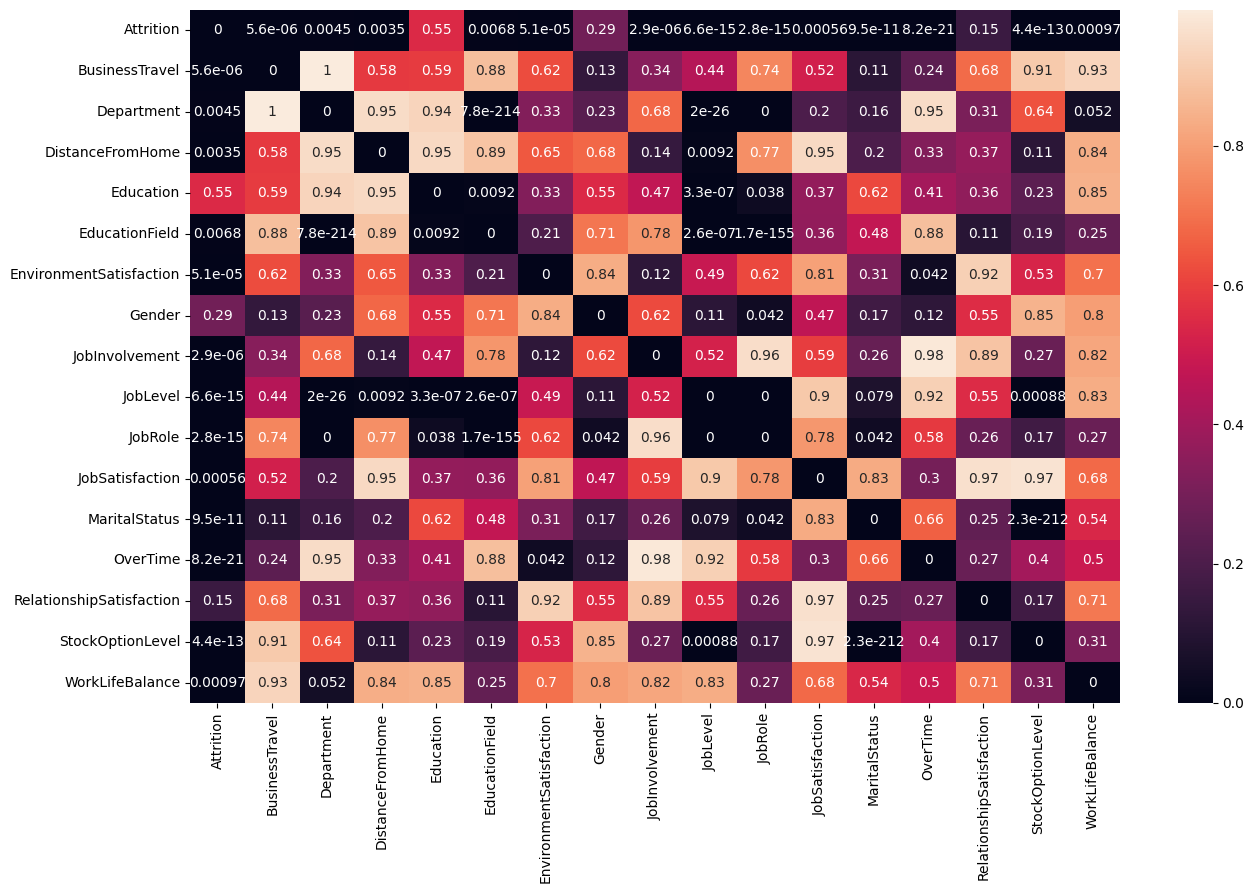

In [28]:
plt.figure(figsize=(15, 9))
sns.heatmap(data=correlation_table,annot = True)
plt.show()

An r value between 0.6 and 0.7 is generally considered a moderately strong positive correlation. It suggests that there is a positive relationship between the two variables, but it's not extremely strong.

An r value between 0.7 and 0.8 is considered a strong positive correlation. This suggests a more pronounced positive relationship between the variables.

An r value greater than 0.8 is typically considered a very strong positive correlation.

## Correlation of Numerical Columns

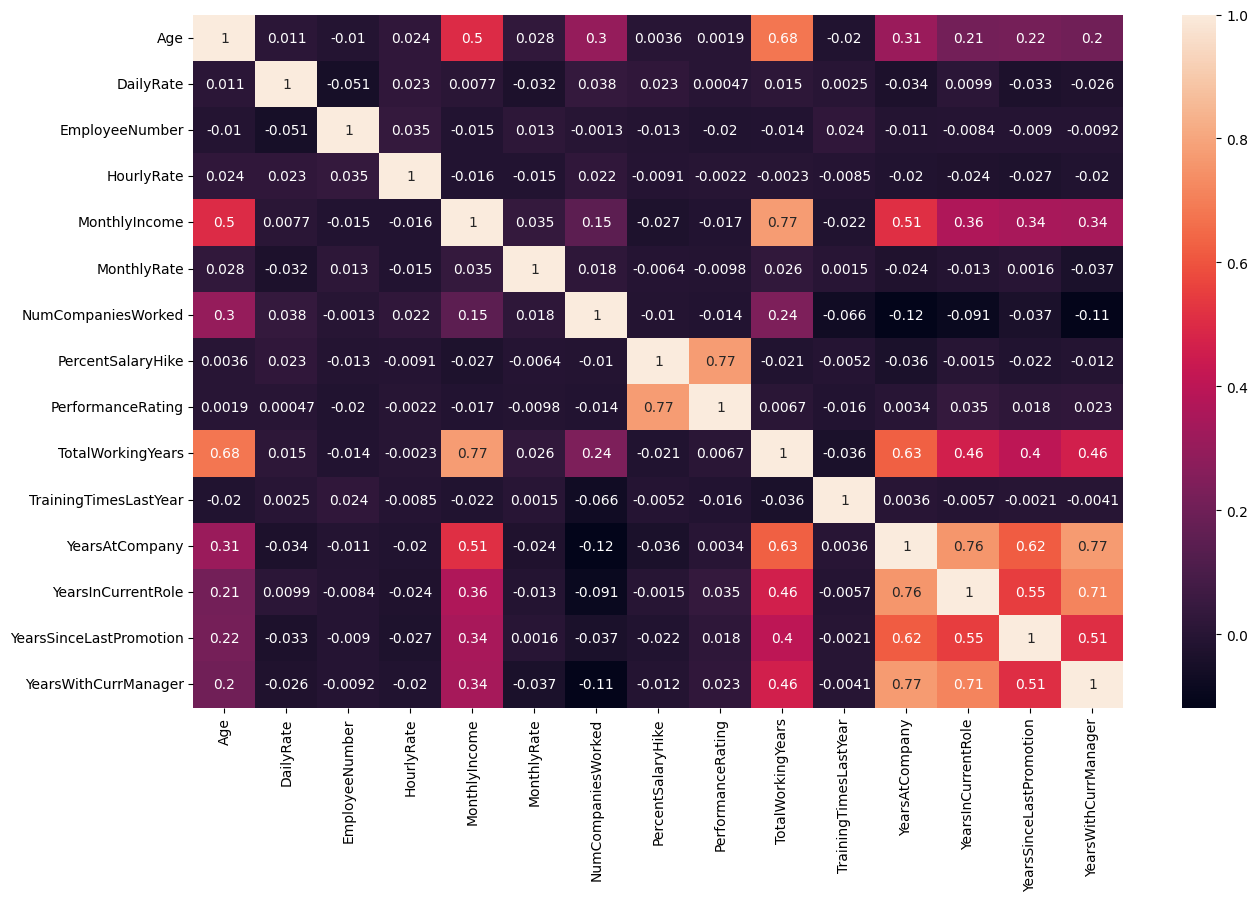

In [29]:
plt.figure(figsize=(15, 9))
sns.heatmap(data=numerical_columns.corr(),annot = True)
plt.show()

## Test of Numerical and Categorical Columns

In [76]:
nc = df[['Attrition','EmployeeNumber']]

- Null hypothesis = No relationship
- Alternative = there is realtionship

In [77]:
import scipy.stats as stats

# Separate data into two groups based on the 'Category' column
group_A = nc[nc['Attrition'] == 'Yes']['EmployeeNumber']
group_B = nc[nc['Attrition'] == 'No']['EmployeeNumber']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(group_A, group_B)

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Determine significance
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('There is a Significant relationship')
else:
    print('There is No Significant relationship')


T-statistic: -0.4052843139019291
P-value: 0.6853275897297122
There is No Significant relationship


### Attrition 

- Monthly income
T-statistic: -6.203935765608938
P-value: 7.14736398535381e-10
There is a Significant relationship

- Age
T-statistic: -6.178663835307217
P-value: 8.356308021103587e-10
There is a Significant relationship

- Daily rate
T-statistic: -2.1740836777017747
P-value: 0.02985816066026497
There is a Significant relationship

- Total working year
T-statistic: -6.6522546135024445
P-value: 4.0618781112668525e-11
There is a Significant relationship

- Training times last year
T-statistic: -2.28290299236669
P-value: 0.022578499737201205
There is a Significant relationship

- years at company
T-statistic: -5.1963086670254235
P-value: 2.3188716103863033e-07
There is a Significant relationship

- year in current role
T-statistic: -6.232038413295282
P-value: 6.003185843641377e-10
There is a Significant relationship

- years with current manager
T-statistic: -6.059068531868998
P-value: 1.7369867845242207e-09
There is a Significant relationship

## Test of two Categorical Columns

In [112]:
cc = df[['Attrition','WorkLifeBalance']]

In [113]:
import scipy.stats as stats

# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(cc['Attrition'], cc['WorkLifeBalance'])

# Perform a chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

# Determine significance
alpha = 0.05  # Set your significance level
if p < alpha:
    print('There is a significant relationship')
else:
    print('There is no significant realitonship')


Chi-square statistic: 16.3250970916474
P-value: 0.0009725698845348824
Degrees of freedom: 3
Expected frequencies:
[[749.02653061 128.33265306 288.53877551  67.10204082]
 [143.97346939  24.66734694  55.46122449  12.89795918]]
There is a significant relationship


### Attrition

- Business travel
Chi-square statistic: 24.182413685655174
P-value: 5.608614476449931e-06
Degrees of freedom: 2
Expected frequencies:
[[125.81632653 232.34081633 874.84285714]
 [ 24.18367347  44.65918367 168.15714286]]
There is a significant relationship

- Department
Chi-square statistic: 10.79600732241067
P-value: 0.004525606574479633
Degrees of freedom: 2
Expected frequencies:
[[ 52.84285714 806.06326531 374.09387755]
 [ 10.15714286 154.93673469  71.90612245]]
There is a significant relationship

- Distance from home
Chi-square statistic: 11.29024474595296
P-value: 0.0035347158209561285
Degrees of freedom: 2
Expected frequencies:
[[201.30612245 171.11020408 860.58367347]
 [ 38.69387755  32.88979592 165.41632653]]
There is a significant relationship

- Educational field
Chi-square statistic: 16.024674119585423
P-value: 0.006773980139025222
Degrees of freedom: 5
Expected frequencies:
[[ 22.64693878 508.29795918 133.36530612 389.19183673  68.77959184
  110.71836735]
 [  4.35306122  97.70204082  25.63469388  74.80816327  13.22040816
   21.28163265]]
There is a significant relationship

- Environmental satisfaction
Chi-square statistic: 22.503881435842295
P-value: 5.1234689062894205e-05
Degrees of freedom: 3
Expected frequencies:
[[379.96530612 374.09387755 240.72857143 238.2122449 ]
 [ 73.03469388  71.90612245  46.27142857  45.7877551 ]]
There is a significant relationship

- Job involvement
Chi-square statistic: 28.492021234659283
P-value: 2.8631806367134195e-06
Degrees of freedom: 3
Expected frequencies:
[[120.78367347 314.54081633 728.05714286  69.61836735]
 [ 23.21632653  60.45918367 139.94285714  13.38163265]]
There is a significant relationship

- job level
Chi-square statistic: 72.52901310667391
P-value: 6.634684715458909e-15
Degrees of freedom: 4
Expected frequencies:
[[ 88.91020408 455.45510204 182.85306122  57.8755102  447.90612245]
 [ 17.08979592  87.54489796  35.14693878  11.1244898   86.09387755]]
There is a significant relationship

- job role
Chi-square statistic: 86.19025367670434
P-value: 2.752481638050657e-15
Degrees of freedom: 8
Expected frequencies:
[[109.87959184  43.61632653 217.24285714  85.55510204 121.62244898
   67.10204082 244.92244898 273.44081633  69.61836735]
 [ 21.12040816   8.38367347  41.75714286  16.44489796  23.37755102
   12.89795918  47.07755102  52.55918367  13.38163265]]
There is a significant relationship

- job satisfaction
Chi-square statistic: 17.505077010348
P-value: 0.0005563004510387556
Degrees of freedom: 3
Expected frequencies:
[[370.73877551 384.99795918 234.85714286 242.40612245]
 [ 71.26122449  74.00204082  45.14285714  46.59387755]]
There is a significant relationship

- Martial status
Chi-square statistic: 46.163676540848705
P-value: 9.45551106034083e-11
Degrees of freedom: 2
Expected frequencies:
[[274.27959184 564.49591837 394.2244898 ]
 [ 52.72040816 108.50408163  75.7755102 ]]
There is a significant relationship

- over time
Chi-square statistic: 87.56429365828768
P-value: 8.15842372153832e-21
Degrees of freedom: 1
Expected frequencies:
[[884.06938776 348.93061224]
 [169.93061224  67.06938776]]
There is a significant relationship

- Stock option level
Chi-square statistic: 60.59830108612225
P-value: 4.379390336108354e-13
Degrees of freedom: 3
Expected frequencies:
[[ 71.29591837 499.91020408 132.52653061 529.26734694]
 [ 13.70408163  96.08979592  25.47346939 101.73265306]]
There is a significant relationship

- work life balance 
Chi-square statistic: 16.3250970916474
P-value: 0.0009725698845348824
Degrees of freedom: 3
Expected frequencies:
[[749.02653061 128.33265306 288.53877551  67.10204082]
 [143.97346939  24.66734694  55.46122449  12.89795918]]
There is a significant relationship

In [117]:
cat = pd.DataFrame({'Categorical':['Business Travel','Department','Distance from home',
                                       'Educational Field','Environmental Satisfaction',
                                       'Job Involvement','Job Level','Job Role','Job Satisfaction'
                                       ,'Martial Status','Over Time','StockOptionLevel',
                                        'Work Life Balance'],
                        'P value':[5.608614476449931e-06,0.004525606574479633,0.0035347158209561285, 
                                   0.006773980139025222,5.1234689062894205e-05,2.8631806367134195e-06,
                                   6.634684715458909e-15,2.752481638050657e-15,0.0005563004510387556,
                                    9.45551106034083e-11,8.15842372153832e-21,
                                    4.379390336108354e-13,0.0009725698845348824]
                        })

In [127]:
cat.style.background_gradient(cmap='Blues')

,Categorical,P value
0,Business Travel,0.000006
1,Department,0.004526
2,Distance from home,0.003535
3,Educational Field,0.006774
4,Environmental Satisfaction,0.000051
5,Job Involvement,0.000003
6,Job Level,0.000000
7,Job Role,0.000000
8,Job Satisfaction,0.000556
9,Martial Status,0.000000


In [123]:
num = pd.DataFrame({'Numerical':['Monthly Income','Age','Daily Rate',
                                       'Total working years','Training time last year',
                                       'Years at company','Years in current role','Years with current Manager'],
                        'P value':[7.14736398535381e-10,8.356308021103587e-10,0.02985816066026497,4.0618781112668525e-11,
                                    0.022578499737201205,2.3188716103863033e-07,6.003185843641377e-10,1.7369867845242207e-09]
                        })

In [128]:
num.style.background_gradient(cmap='Blues')

,Numerical,P value
0,Monthly Income,0.000000
1,Age,0.000000
2,Daily Rate,0.029858
3,Total working years,0.000000
4,Training time last year,0.022578
5,Years at company,0.000000
6,Years in current role,0.000000
7,Years with current Manager,0.000000


In [31]:
categorical_columns.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'WorkLifeBalance'],
      dtype='object')

In [32]:
numerical_columns.columns

Index(['Age', 'DailyRate', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')